In [1]:
# pip install stochpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import stochpy


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

In [3]:
import matplotlib.pyplot as plt

In [4]:
smod = stochpy.SSA()

In [5]:
smod.Model(model_file = 'StemCellHierarchy.psc', dir = '/Users/wuxi/Desktop')

In [6]:
%time smod.DoStochSim(end = 150,mode = 'time', trajectories = 1000)

CPU times: user 3min 44s, sys: 6.11 s, total: 3min 51s
Wall time: 4min


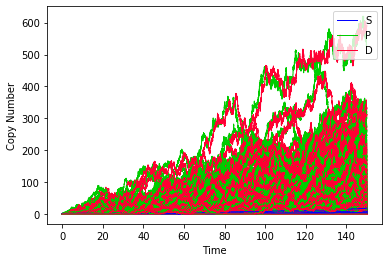

In [7]:
smod.PlotSpeciesTimeSeries()

*** WARNING ***: No regular grid is created yet. Use GetRegularGrid(n_samples) if averaged results are unsatisfactory (e.g. more or less 'samples')


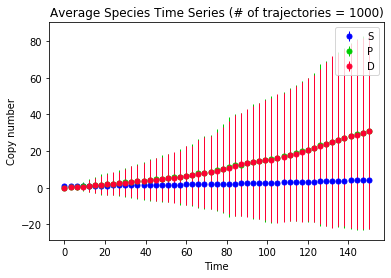

In [8]:
smod.PlotAverageSpeciesTimeSeries()

In [9]:
# smod.PrintAverageSpeciesTimeSeries()

In [10]:
x = smod.data_stochsim_grid
result = x.species
print(np.shape(result))

(3, 1000, 51)


In [11]:
x.getTime()

array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,
        33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,
        66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,
        99., 102., 105., 108., 111., 114., 117., 120., 123., 126., 129.,
       132., 135., 138., 141., 144., 147., 150.])

In [12]:
stem = result[0]
progenitor = result[1]
differentiated = result[2]
print(np.shape(stem))

(1000, 51)


In [13]:
stemCount = np.transpose(stem)[-1]
proCount = np.transpose(progenitor)[-1]
diffCount = np.transpose(differentiated)[-1]
# print(diffCount)

(array([814., 108.,  41.,  23.,   6.,   7.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 1.1240e+02, 2.2380e+02, 3.3520e+02, 4.4660e+02,
        5.5800e+02, 6.6940e+02, 7.8080e+02, 8.9220e+02, 1.0036e+03,
        1.1150e+03]),
 <a list of 10 Patch objects>)

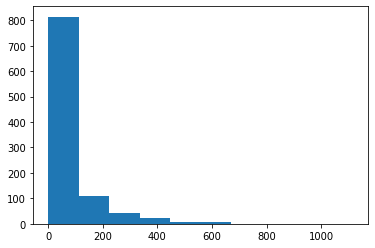

In [14]:
count = np.concatenate((stemCount,proCount,diffCount))
cellCount = np.transpose(count.reshape(3,int(len(count)/3)))
cloneSize = [sum(i) for i in cellCount]
plt.hist(cloneSize)

In [15]:
def negativeBinomialDistribution(divisionRate, countingTimePoint, n):
    n0 = divisionRate * countingTimePoint / 2
    N0 = np.log(n0)
    P = 1 / N0 * np.exp(-n/n0) / n
    return(P)

cloneSizeRange = np.asarray(range(int(max(cloneSize))))
%time NBD = negativeBinomialDistribution(divisionRate=1.5, countingTimePoint=150, n=cloneSizeRange)

CPU times: user 344 µs, sys: 148 µs, total: 492 µs
Wall time: 1.68 ms


minimum clone size = 1
maximum clone size = 1115
CPU times: user 1.17 s, sys: 11.7 ms, total: 1.18 s
Wall time: 1.19 s


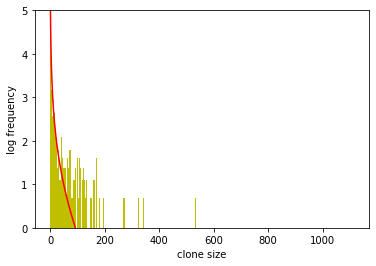

In [18]:
def logSizeDistribution(cloneSizes,NBD):
    minimum = int(min(cloneSizes))
    print('minimum clone size = ' + str(minimum))
    maximum = int(max(cloneSizes))
    print('maximum clone size = ' + str(maximum))
    x = np.asarray(range(maximum))
    sizes = list(np.array(cloneSizes))
    freq = np.asarray([sizes.count(i+1) for i in range(maximum)])
    plt.bar(x,np.log(freq),width=2,color='y') 
    plt.plot(x, np.log(len(cloneSizes)*NBD), 'r')
    plt.ylim((0, 5))
    plt.xlabel('clone size')
    plt.ylabel('log frequency')
    
%time logSizeDistribution(cloneSize,NBD)

In [17]:
# data= smod.data_stochsim
# P= data.species_labels.index('P')
# plt.plot(data.time, data.species[:,P])
# plt.title("progenitor cell")